In [1]:
%matplotlib inline 

import pandas as pd 
import seaborn as sns 

In [8]:
sns.set_style('whitegrid')
sns.set_context('poster')

### All Messages

In [16]:
data = pd.read_csv('results.csv')

In [17]:
data["latency (μs)"] = data["latency (ns)"] / 1000

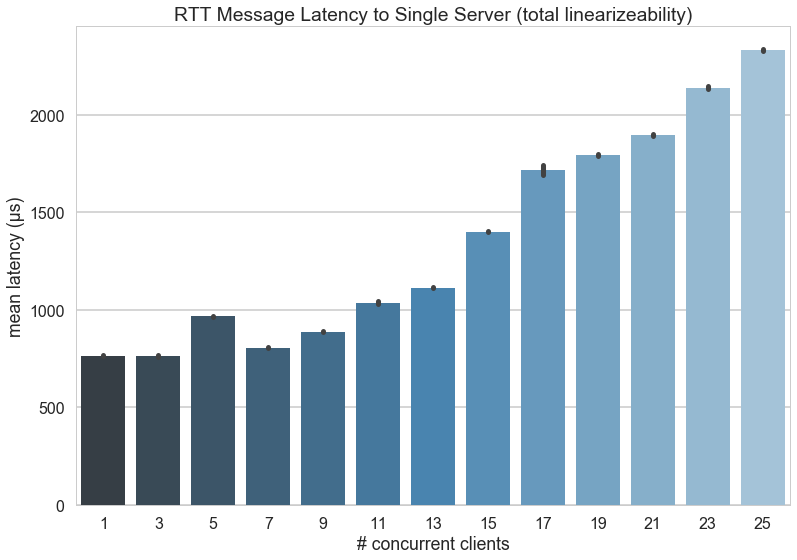

In [9]:
g = sns.barplot("clients", "latency (μs)", data=data, palette="Blues_d")
g.set_title("RTT Message Latency to Single Server (total linearizeability)")
g.set_ylabel("mean latency (μs)")
g.set_xlabel("# concurrent clients")

### Sample of Messages

In [18]:
data = data.sample(frac=0.1)

In [28]:
data = data[data["latency (μs)"] < 5000.0]

In [29]:
data.describe()

,clients,latency (ns),latency (μs)
count,335048.00000,3.350480e+05,335048.000000
mean,14.96151,1.335117e+06,1335.117352
std,6.46556,8.530676e+05,853.067565
min,1.00000,2.027580e+05,202.758000
25%,9.00000,6.907792e+05,690.779250
50%,15.00000,1.120420e+06,1120.420000
75%,21.00000,1.756270e+06,1756.270250
max,25.00000,4.999442e+06,4999.442000


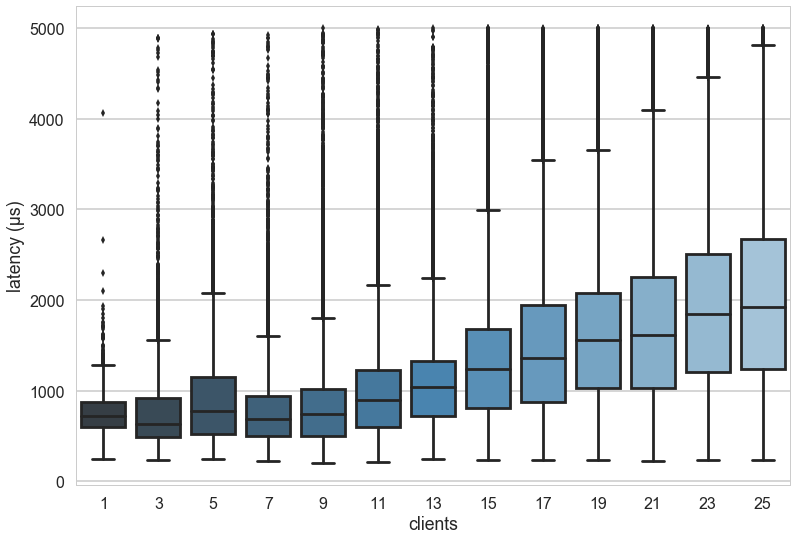

In [33]:
g = sns.boxplot("clients", "latency (μs)", data=data, palette="Blues_d")

### Per-Machine Aggregates

In [10]:
data = pd.read_csv('throughput.csv')

In [11]:
data.describe()

,clients,messages,latency (ns),bytes
count,169.000000,169.000000,1.690000e+02,1.690000e+02
mean,17.307692,20244.869822,2.967853e+10,9.583974e+05
std,6.137318,7913.115783,3.324709e+08,3.789484e+05
min,1.000000,10666.000000,2.881337e+10,4.997270e+05
25%,13.000000,14087.000000,2.962512e+10,6.634730e+05
50%,19.000000,17111.000000,2.972315e+10,8.082660e+05
75%,23.000000,27398.000000,2.979560e+10,1.301017e+06
max,25.000000,40395.000000,3.224504e+10,1.923333e+06


In [12]:
data['throughput (msg/sec)'] = data['messages'] / (data['latency (ns)'] / 1000000000)

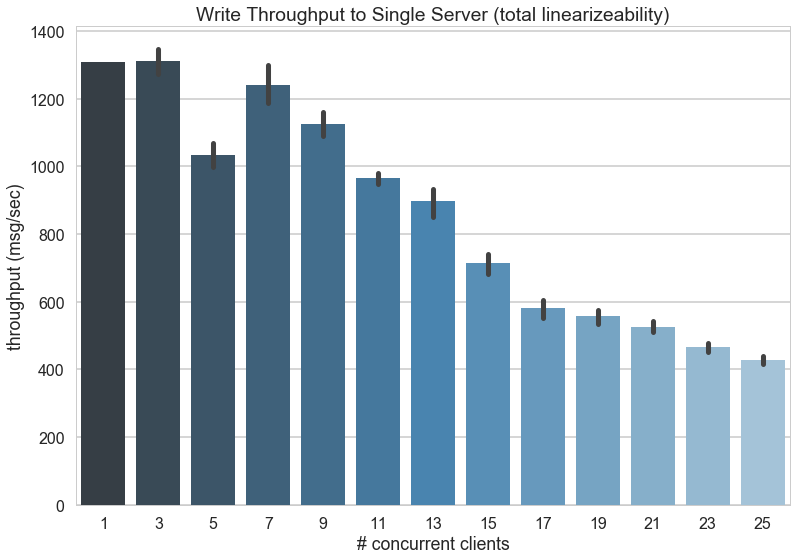

In [15]:
g = sns.barplot("clients", "throughput (msg/sec)", data=data, palette="Blues_d")
g.set_title("Write Throughput to Single Server (total linearizeability)")
g.set_ylabel("throughput (msg/sec)")
g.set_xlabel("# concurrent clients")